In [5]:
import heapq
import graphviz
import os

In [6]:
# N:ノードの数　
# W:エッジ(辺)の数
# xyz (x:始点、y:終点、z:重み)

N = 6
W = 9
xyz = [(0, 1, 1),
       (0, 2, 3),
       (1, 2, 1),
       (1, 3, 7),
       (2, 4, 6),
       (1, 4, 3),
       (3, 4, 1),
       (3, 5, 1),
       (4, 5, 6)]

graph = [[] for i in range(N)]

for i in range(W):
    graph[xyz[i][0]].append((xyz[i][1], xyz[i][2]))
    graph[xyz[i][1]].append((xyz[i][0], xyz[i][2]))

In [7]:
def add_color(a1, a2):
    G.node(str(a1), style="filled", fillcolor='red')
    G.node(str(a2), style="filled", fillcolor='red')
    G.edge(str(a1), str(a2), color='red', penwidth="3")

picnum = 0
def save_graph(name=""):
    global picnum
    if name == "":
        name = str(picnum)
        picnum += 1
    G.render("svg/"+name)
    os.remove("svg/"+name)

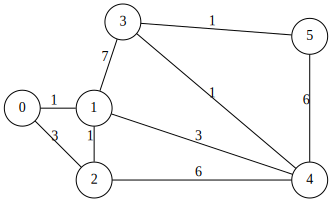

In [8]:
G = graphviz.Graph(engine='neato', format='svg', strict=True)
positions = ["0,0!", "1,0!", "1,-1!", "1.4,1.2!", "4,-1!", "4,1!"]
for i in range(N):
    G.node(str(i), pos=positions[i], shape='circle')
for i in range(W):
    G.edge(str(xyz[i][0]), str(xyz[i][1]), label=str(xyz[i][2]))
display(G)
#save_graph("default")

In [9]:
def Prim():
    used = [False]*N
    ans = 0
    edgelist = []
    for e in graph[0]: # 0から始める
        heapq.heappush(edgelist, (e[::-1], 0)) # graph描画のため、どこから来たかの情報も加える。
    used[0] = True 
    v = 1
    while v < N:
        p = heapq.heappop(edgelist)
        minedge = p[0] # minedge[0]->重み、minedge[1]->向かう先
        fr = p[1] # from
        if used[minedge[1]]:
            continue
        ans += minedge[0]
        v += 1
        used[minedge[1]] = True
        
        add_color(fr, minedge[1])
        display(G)
        #save_graph()
        
        for e in graph[minedge[1]]:
            if not used[e[0]]:
                heapq.heappush(edgelist, (e[::-1], minedge[1]))
    return ans

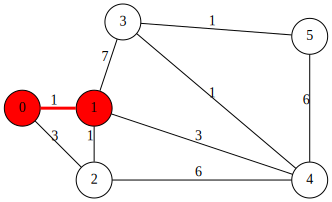

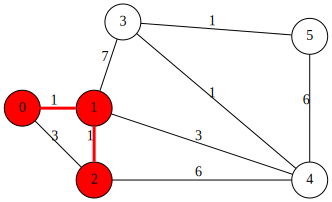

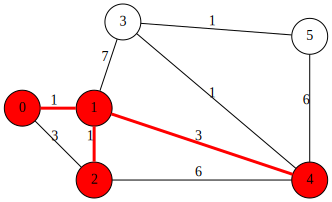

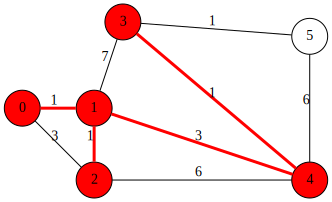

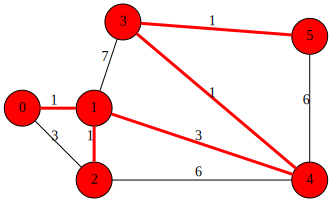

7

In [10]:
Prim()